In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

In [7]:
# с помощью системной библиотеки OS определяем путь до файла с данными
dirname = os.path.abspath(os.curdir) + r'\datahw2'

# загружаем данные в переменную, содержащую объект библиотеки Pandas - Dataframe
tsdf_c = pd.read_csv(path.join(os.sep, dirname, 'data2.csv'))
# устанавливаем индекс времени для временного ряда и сортируем по нему выборку
#tsdf_c.set_index(' ').sort_index()

# аналогичным образом загружаем данные о пассажирах
#passengers = pd.read_csv('data/passengers.csv')
# неподходящий формат данных приводим к тому, с которым Pandas может работать
#passengers['Month'] = pd.to_datetime(passengers['Month'])
# также устанавливаем индекс и сортируем
#df = passengers.set_index('Month').sort_index()

In [8]:
tsdf_c.head()

,Unnamed: 0,Chemicals,Coal,Petrol,Vehicles
0,1,3.896,49.780,2.154,4.367
1,2,4.346,47.029,2.250,5.147
2,3,4.318,56.920,2.165,5.418
3,4,4.536,54.336,2.223,4.897
4,5,4.454,50.442,2.190,5.002


In [9]:
tsdf_c.describe()

,Unnamed: 0,Chemicals,Coal,Petrol,Vehicles
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,13.700135,65.669290,10.764841,11.743694
std,72.890329,6.128043,14.249325,5.113300,5.113334
min,1.000000,3.896000,11.857000,2.154000,3.537000
25%,63.750000,8.270750,54.506000,6.618750,7.167250
50%,126.500000,14.082500,68.201000,10.921500,11.054000
75%,189.250000,17.328250,76.292750,15.314750,16.108750
max,252.000000,25.487000,93.078000,19.604000,23.388000


In [10]:
df = tsdf_c.set_index('Chemicals').sort_index()
df.head()

,Unnamed: 0,Coal,Petrol,Vehicles
Chemicals,,,,
3.896,1,49.780,2.154,4.367
3.997,12,56.032,2.279,4.446
4.058,7,39.537,2.250,3.537
4.289,11,26.327,2.285,5.400
4.318,3,56.920,2.165,5.418


In [11]:
df.describe()

,Unnamed: 0,Coal,Petrol,Vehicles
count,252.000000,252.000000,252.000000,252.000000
mean,126.500000,65.669290,10.764841,11.743694
std,72.890329,14.249325,5.113300,5.113334
min,1.000000,11.857000,2.154000,3.537000
25%,63.750000,54.506000,6.618750,7.167250
50%,126.500000,68.201000,10.921500,11.054000
75%,189.250000,76.292750,15.314750,16.108750
max,252.000000,93.078000,19.604000,23.388000


Графическое представление и описание поведения временного ряда

In [12]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1 )

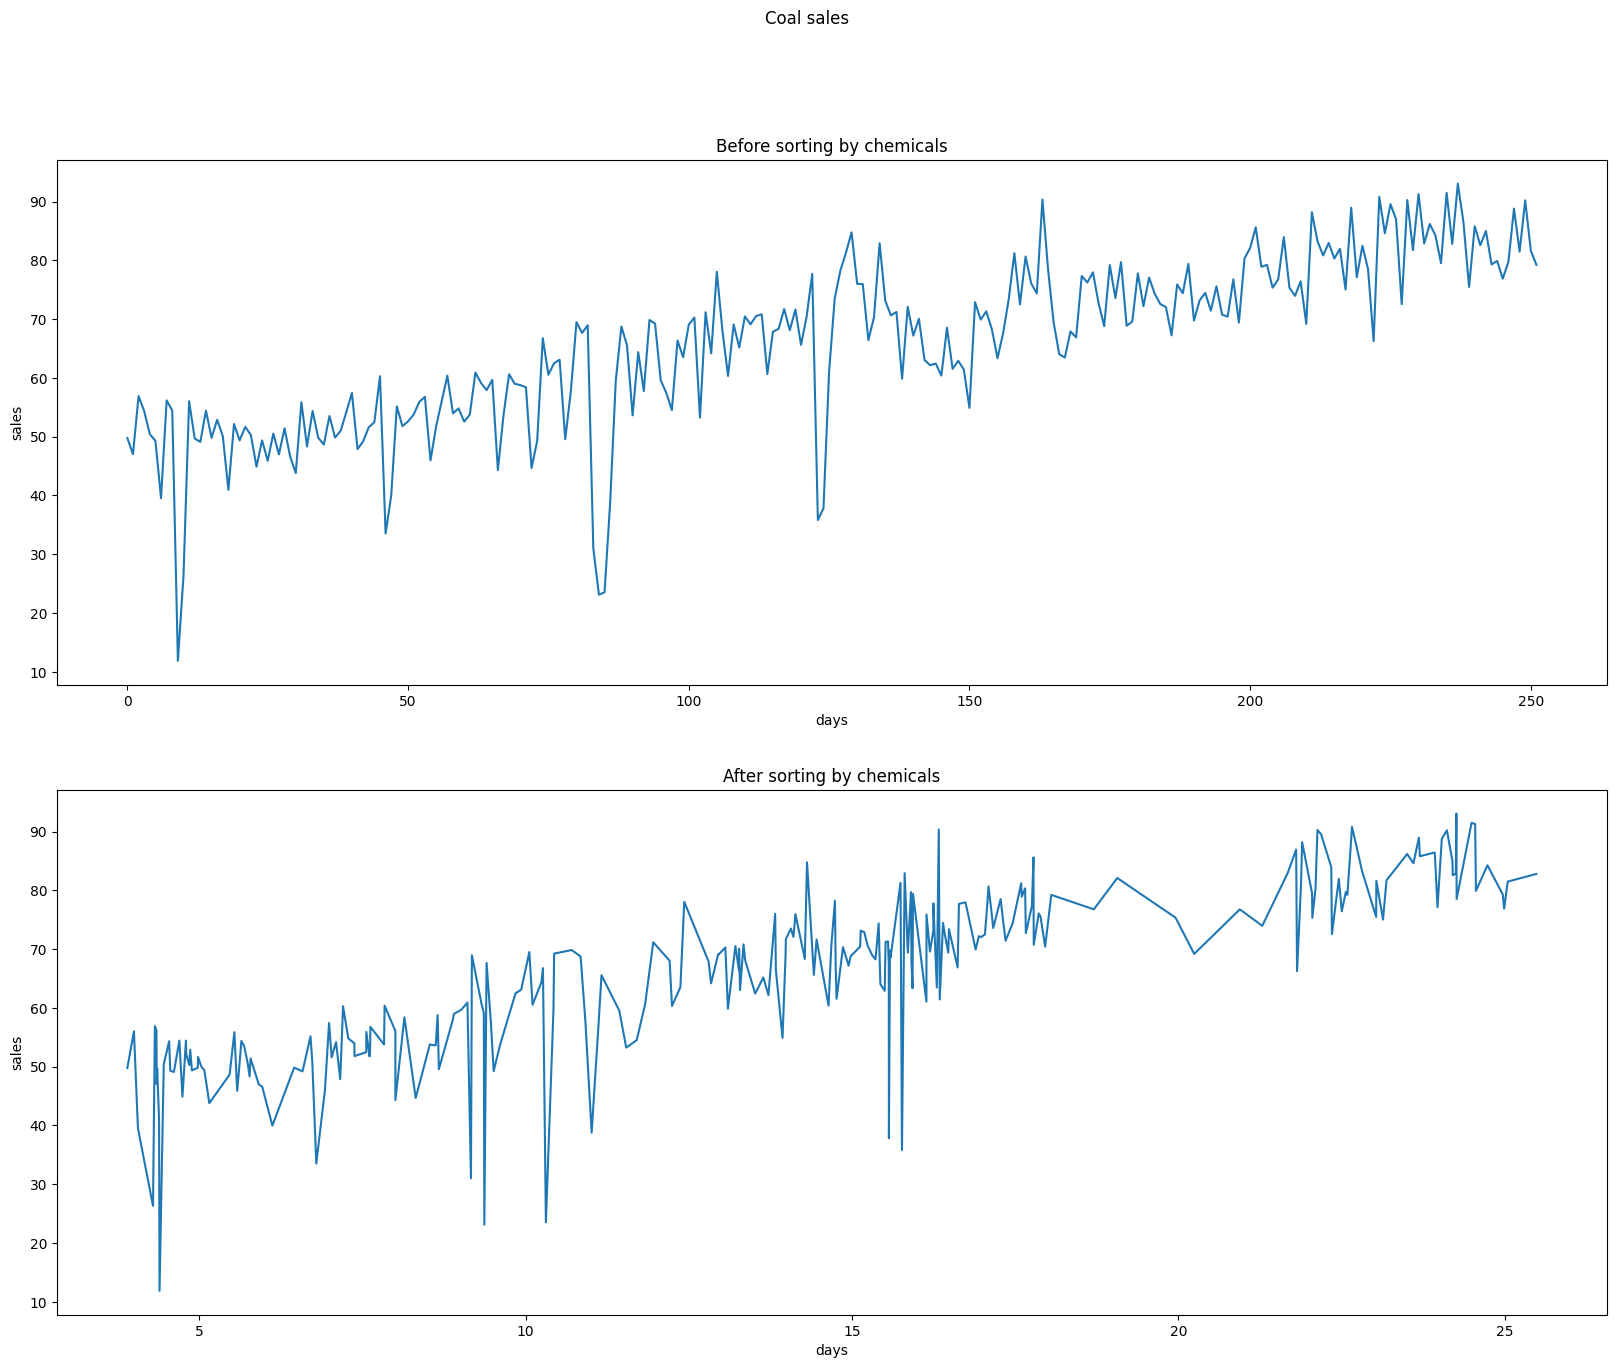

In [27]:
fig, axs = plt.subplots(2,1,figsize=(20, 15))
fig.suptitle('Coal sales')

plot_assignation(axs[0], tsdf_c["Coal"], 'days', 'sales','Before sorting by chemicals')
plot_assignation(axs[1], df["Coal"], 'days', 'sales','After sorting by chemicals')

#axs[1].plot(df["Coal"])

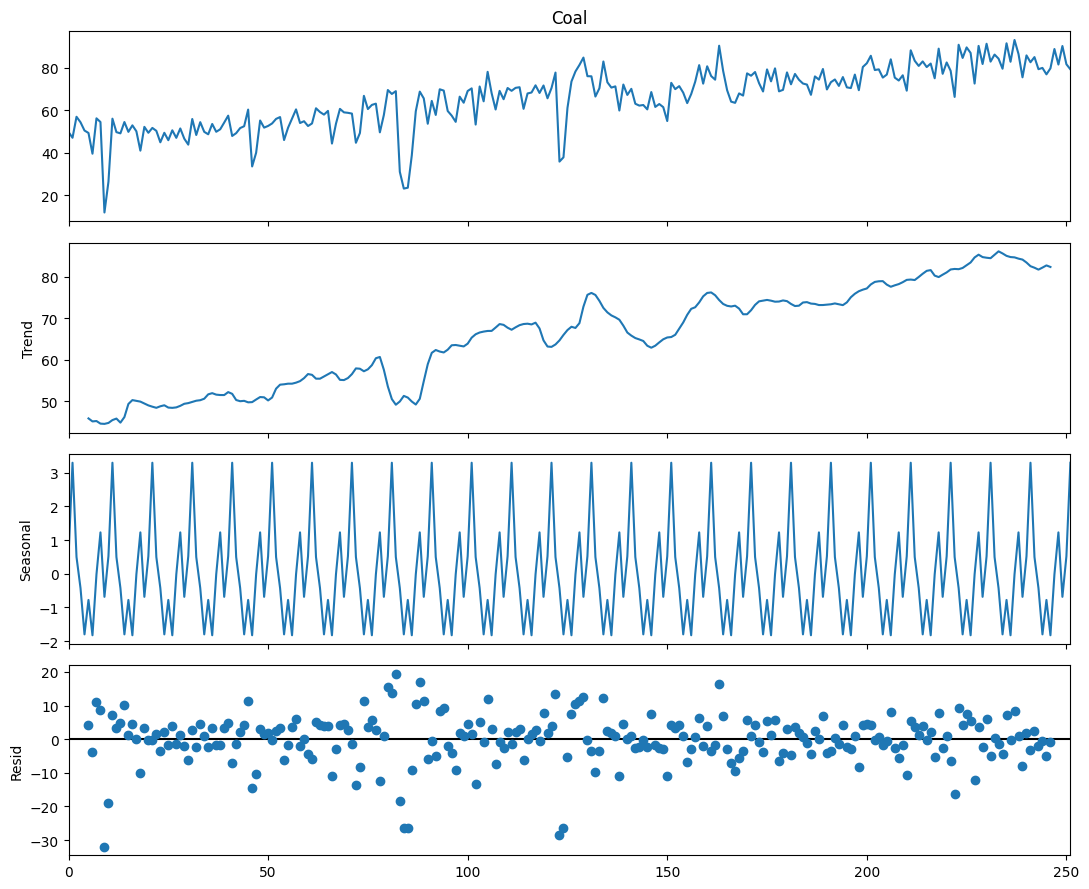

In [29]:
# импортируем функцию seasonal_decompose из statsmodels
# (то есть осуществляем декомпозицию сигнала/временного ряда)
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным 
decompose = seasonal_decompose(tsdf_c["Coal"], period=10)
decompose.plot()
plt.show()

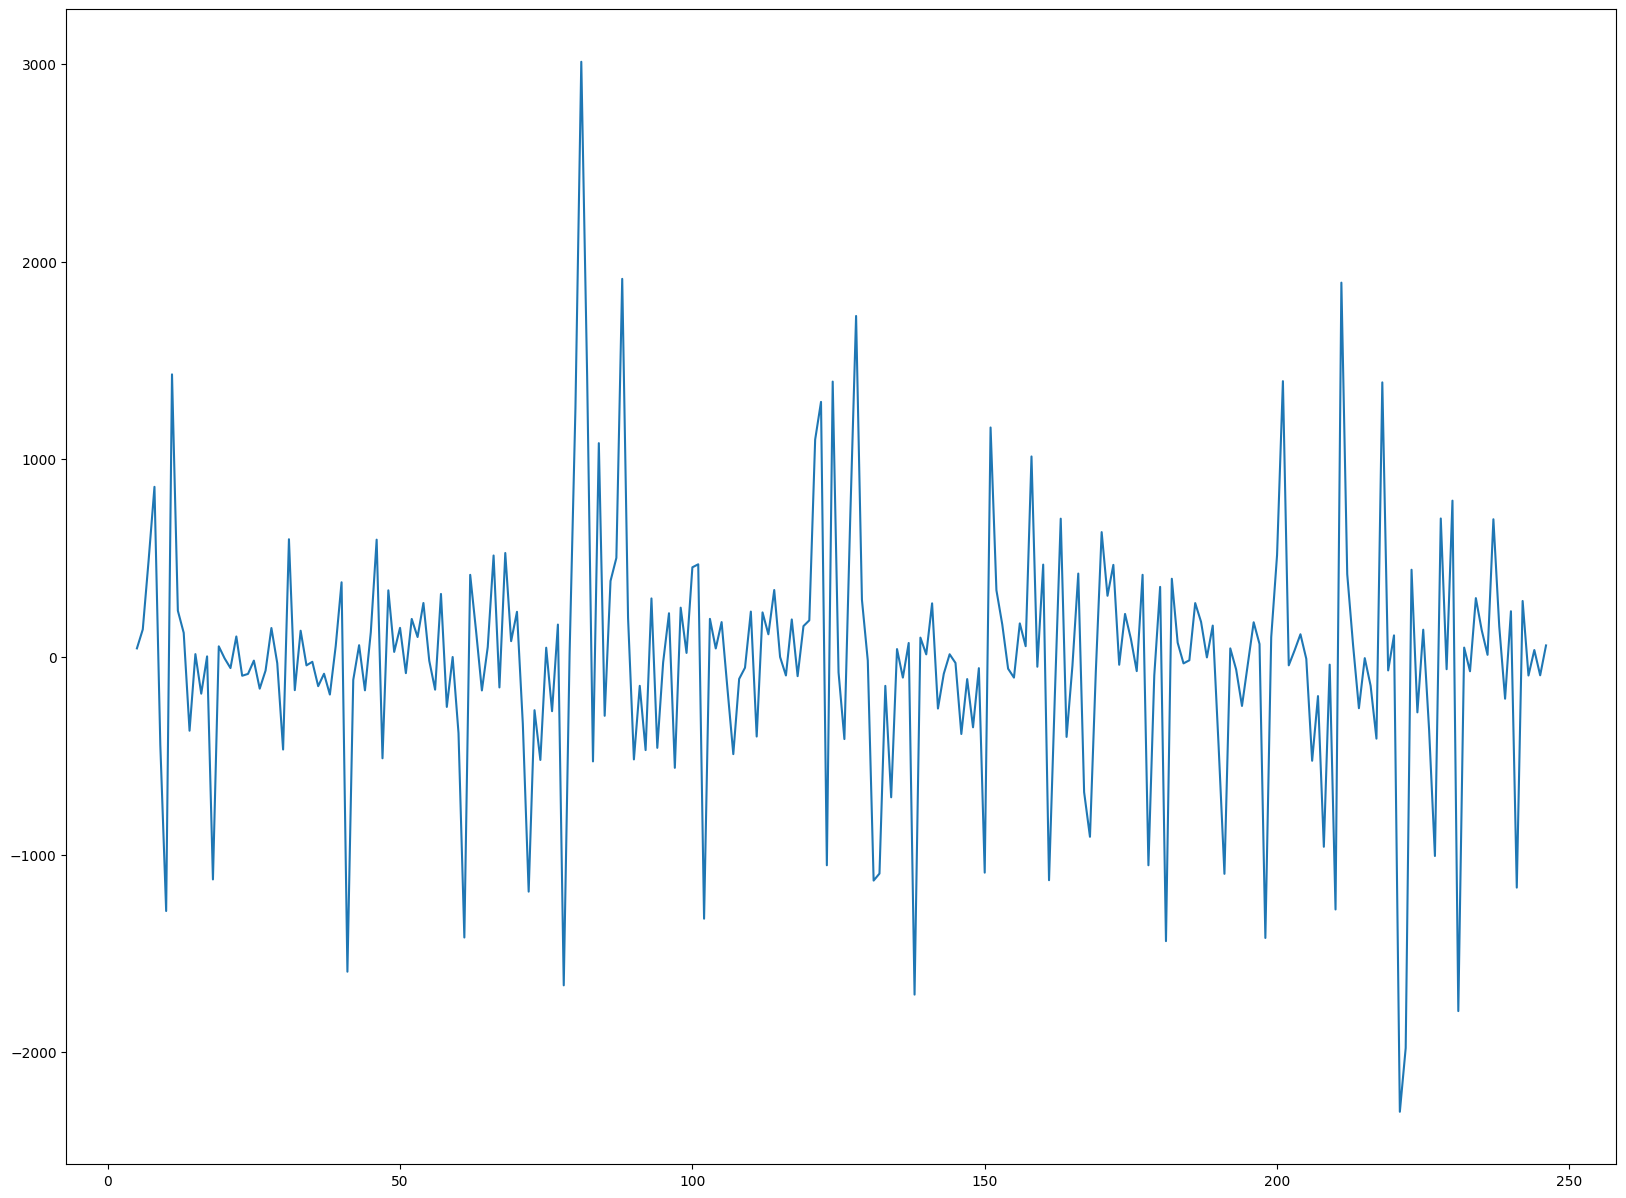

In [30]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))
 
plt.plot(new_ps)
plt.show()

<Axes: >

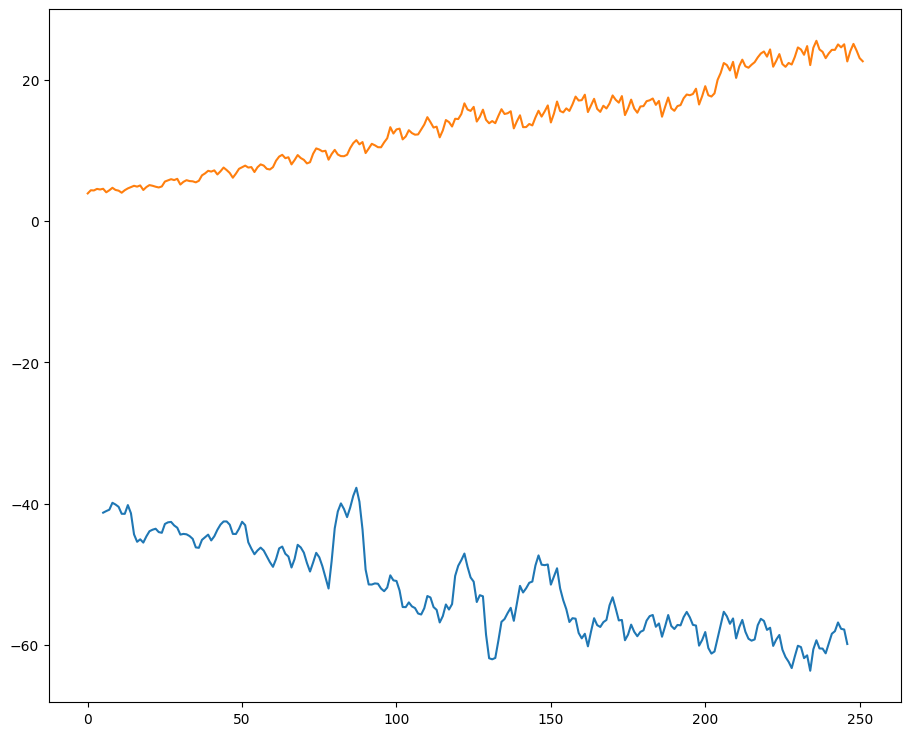

In [31]:
# удаляем компонент тренда из временного ряда...
tsdf_c_r = tsdf_c["Chemicals"] - decompose.trend
# ...и отрисовываем обработанный и исходный ряды
tsdf_c_r.plot()
tsdf_c["Chemicals"].plot()

Стационарный процесс

In [33]:
# импортируем функцию, описывающую тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

In [34]:
alpha = 0.05
name = "Chemicals"
ts = tsdf_c["Chemicals"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Chemicals :
Test Statistic                  -0.631257
p-value                          0.863762
#Lags Used                      15.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


Тренд

C:\Users\anoch\AppData\Local\Temp\ipykernel_20060\1110318620.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


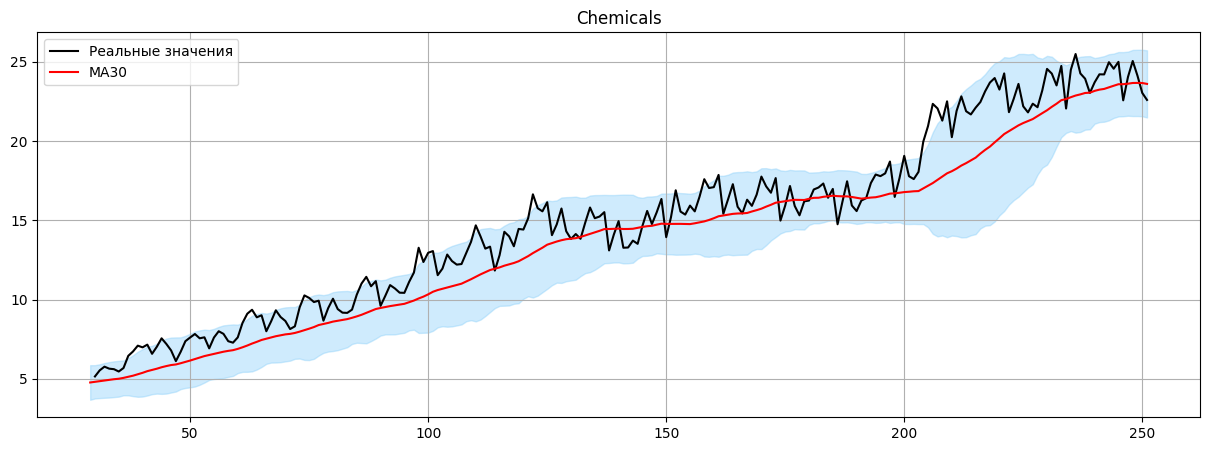

In [35]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

Автокорреляция и коррелограмма

In [36]:
import statsmodels.tsa.api as smt

<Figure size 1200x700 with 0 Axes>

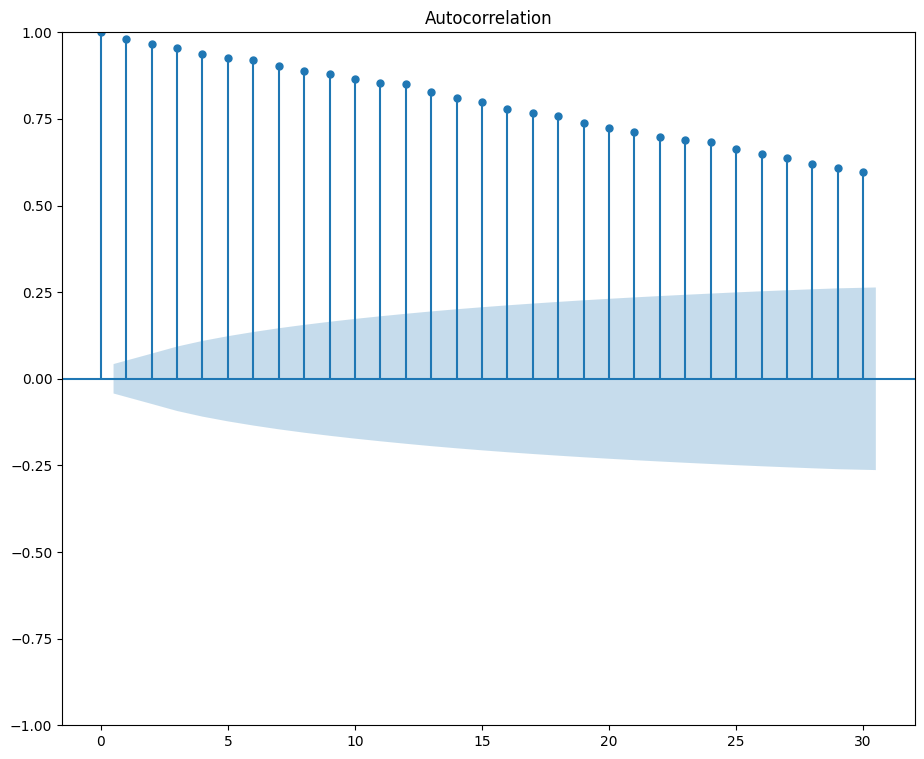

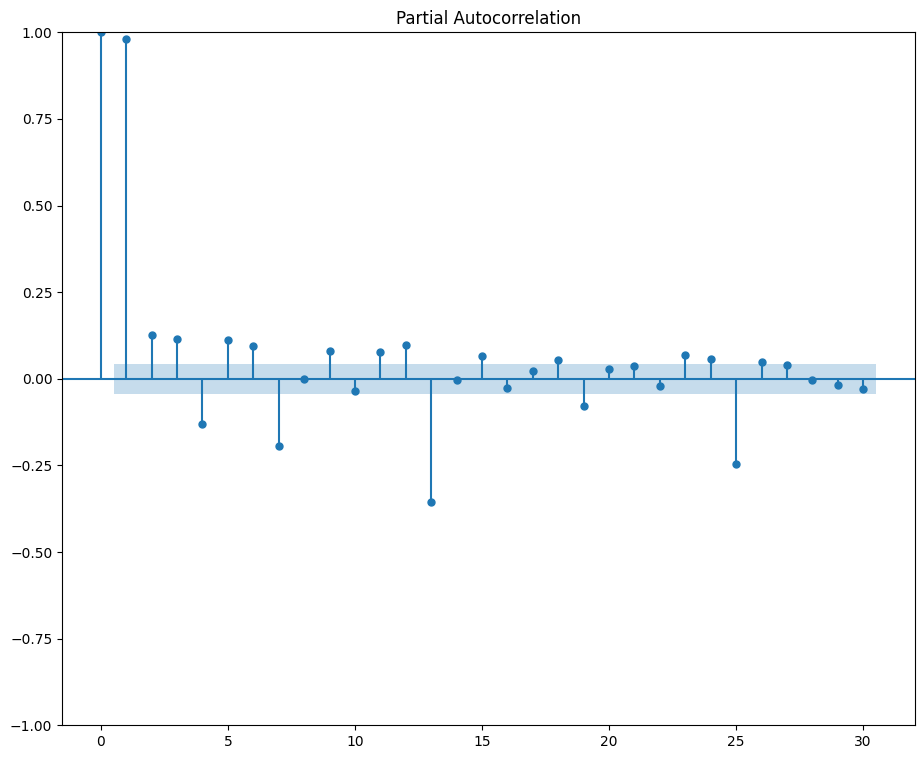

In [37]:
ts = tsdf_c["Chemicals"]


fig = plt.figure(figsize=(12, 7))
# рисуем автокорреляционную функцию
# 
# изображение отрисовывается с запаздываниями по горизонтали и корреляциями по
# вертикали
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

# есть также функция отрисовки частичной автокорреляции
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

# Частичная автокорреляция (Partial Autocorrelation) — это краткая
# характеристика взаимосвязи между наблюдением во временном ряду и наблюдениями
# на предыдущем отрезке времени, когда влияние малой задержки устранено.
# Автокорреляция состоит как из прямой, так и из косвенной корреляции.

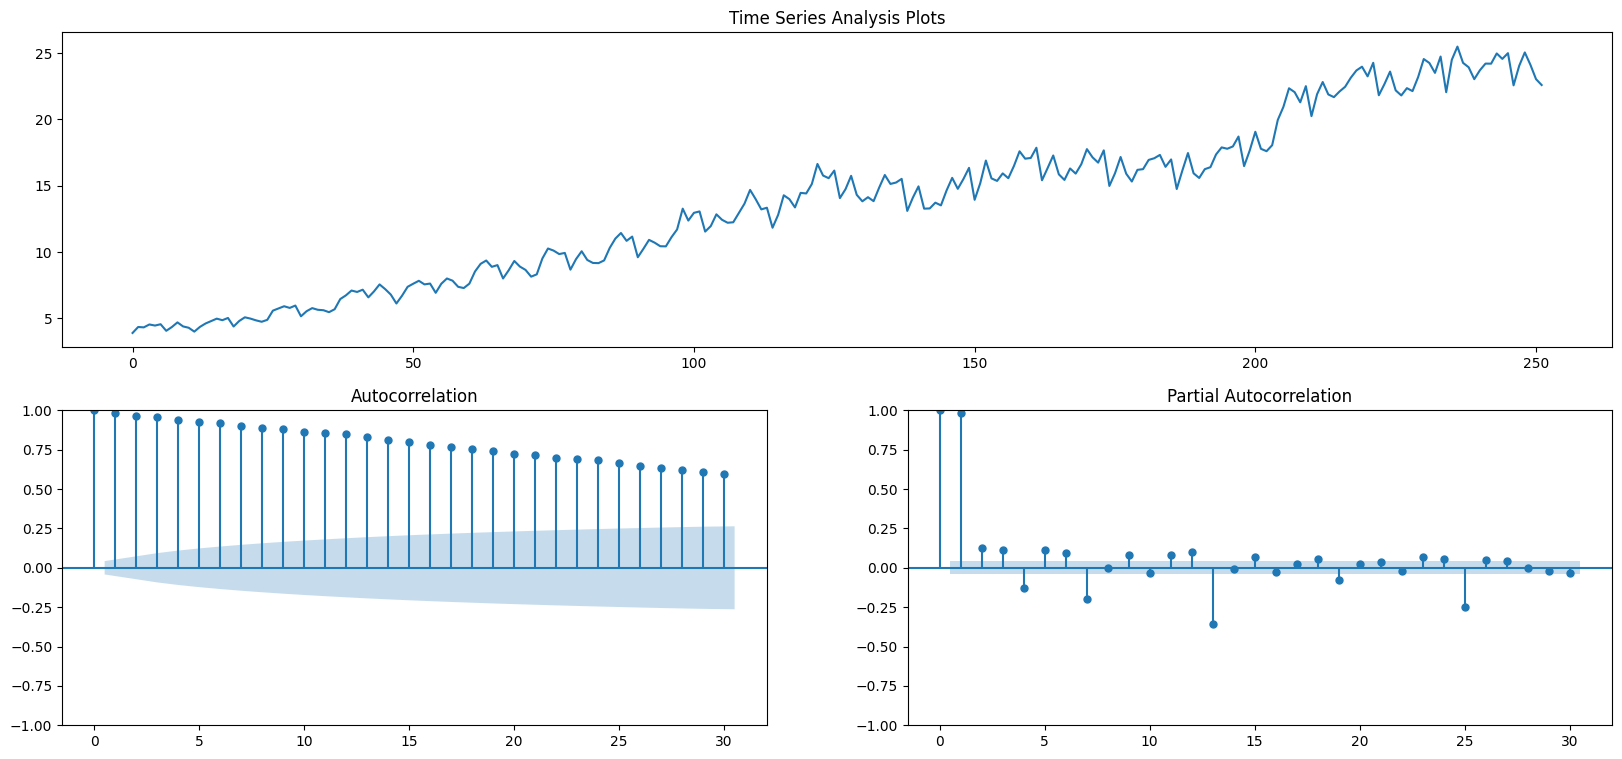

In [38]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None